In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Question 2.1
Answer: Since an IF nueron model doesn’t leak out the inputs over time, even a very low input current can accumulate voltage over a very long time to reach the threshold and spike. A LIF will not spike since inputs overtime will leak away and therefore the low input will never reach the threshold, never spiking.

### Question 2.2
Answer: When fed with larger input currents IF and LIF would look pretty similar, both would spike when reaching threshold, then reset to its resting potential, and the models would continue to run until the input ends.

### Question 2.3
Answer: Each time when a LIF model spikes, its membrane potential is immeadiately reset. In the HH model, when recieved a large input current over a cetain time, the spikes would become slightly smaller over time since the ions in the nueron were not fully recharged before the next spike. Since LIF has no memory of the previous spikes, all its spikes would look the same.

### Question 3.1
Plotting LIF nueron model:

In [118]:
def LIF(I, Cm, Rm):
    #I: input current array
    #Cm: constant capitance
    #Rm: resistance parameter
    Vt=30  
    V_r = -65 # resting voltage
    spike=80
    dt = 0.02
    T = (I.size)*dt
    
    # an array of time
    time = np.arange(0, T, dt)
    V = (-65)*np.ones(len(time))    # Voltage array, setting all to resting for now, since no input has gone through yet
    indicator=False                 # count spikes to get firing rate
    LIF.spikes=0                    
    
    for i in range(0, len(time)):
        # using "I - V(t)/Rm = Cm * dV/dT"
        dV =  (I[i] - (V[i-1]-V_r)/Rm)/Cm
        if indicator==True:
            V[i] = V_r + dV*dt
        else:
            V[i] = V[i-1] + dV*dt
        indicator=False

        # when exceed threshold
        if V[i] > Vt:
            V[i] = spike   # set the last step to spike value
            LIF.spikes=LIF.spikes+1
            if i != len(time): 
                V[i+1] = V_r       # current step is resting membrane potential
                indicator= True
    return V

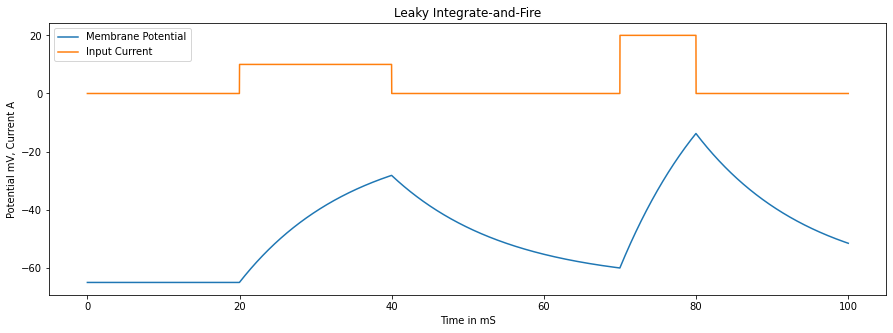

In [125]:
#input to show potential decay over time

#input current array
T = 100                      
dt  = 0.02                   
time = np.arange(0, T+dt, dt) 
I = np.zeros(len(time))
I[1000:2000] = 10
I[3500:4000]= 20     


V = LIF(I=I, Cm=0.003,Rm=5)

fig = plt.figure("LIF nueron", figsize=(15, 5))
ax = fig.add_subplot(111)
plt.title("Leaky Integrate-and-Fire")


lineV = plt.plot(time, V, label="Membrane Potential")[0]
lineI = plt.plot(time, I, label="Input Current")[0]

plt.legend(loc="upper left")

# add axis labels
plt.ylabel("Potential mV, Current A")
plt.xlabel("Time in mS")

plt.show()

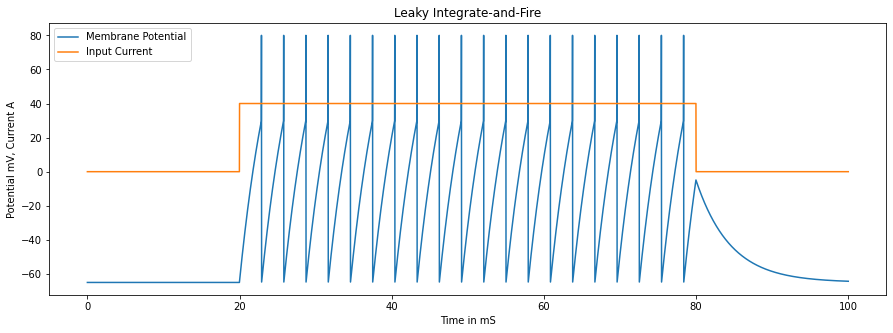

In [138]:
#input to show spiking behaviour

#input current array
T = 100                      
dt  = 0.02                   
time = np.arange(0, T+dt, dt) 
I = np.zeros(len(time))
I[1000:4000] = 40  


V = LIF(I=I, Cm=0.0009,Rm=5)

fig = plt.figure("LIF nueron", figsize=(15, 5))
ax = fig.add_subplot(111)
plt.title("Leaky Integrate-and-Fire")


lineV = plt.plot(time, V, label="Membrane Potential")[0]
lineI = plt.plot(time, I, label="Input Current")[0]

plt.legend(loc="upper left")

# add axis labels
plt.ylabel("Potential mV, Current A")
plt.xlabel("Time in mS")

plt.show()


### Question 3.2
Plotting spike rate with input current

Text(0, 0.5, 'spike rate per ms')

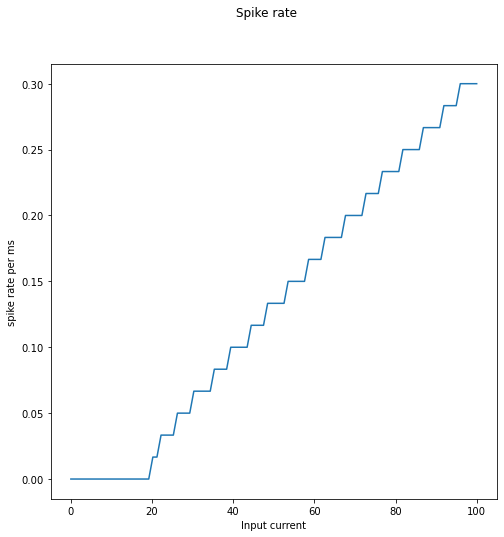

In [161]:
#Question 3.2
#input current from 0-100
Input_Current=np.linspace(0,100,100)
Y=np.empty(Input_Current.size)
for i in range(Input_Current.size):
    T = 100                      
    dt  = 0.02                   
    time = np.arange(0, T+dt, dt) 
    I = np.zeros(len(time))
    I[1000:4000] =  Input_Current[i]
    LIF(I=I, Cm=0.003,Rm=5)
    Y[i]=LIF.spikes/(time[4000]-time[1000])

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Spike rate")
plt.plot(Input_Current,Y)
plt.xlabel("Input current")
plt.ylabel("spike rate per ms")

### Question 3.3
Answer: As input current increases, the firing rate also increases since the currents would make the voltage reach the threshold faster.

### Question 3.4

In [166]:
def Izhikevich(I,a,b,c,d):
    Vt=30
    V_r = -65 # resting voltage
    spike=80
    dt=0.02
    T = (I.size)*dt
    time = np.arange(0, T, dt)
    V = (-65)*np.ones(len(time))
    U = np.zeros(len(time))
    U[0]=b*V[0]
    
    for i in range(0, len(time)-1):
        #U[current]=slope of U[previous]*time(current-previous)
        U[i+1]=U[i]+dt*(a*(b*V[i]-U[i]))
        #V[current]=slope of V[previous]*time(current-previous)
        V[i+1]=V[i]+dt*(0.04*V[i]**2+5*V[i]+140-U[i]+I[i])
        
        # "when v reaches 30 mV, the cell fires, and then v is reset to c, and u increases by d"
        if V[i+1]>Vt:
            V[i+1]=c
            U[i+1]=U[i+1]+d
    return V

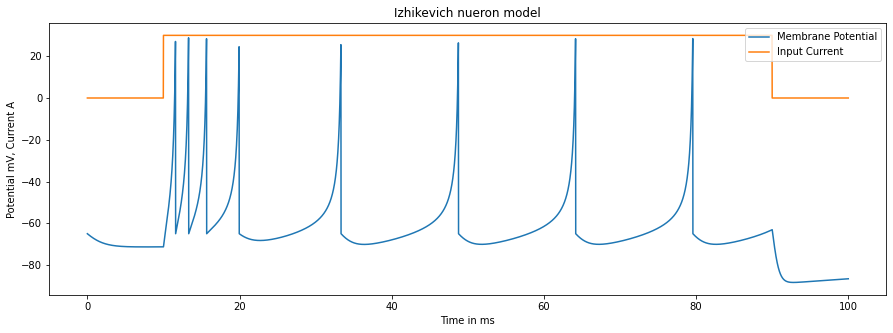

In [172]:
T = 100                     
dt  = 0.02                  
time = np.arange(0, T+dt, dt) 
I = np.zeros(len(time))
I[500:4500] = 30

V=Izhikevich(I=I,a=0.02,b=0.2,c=-65,d=8)

fig = plt.figure("Izh", figsize=(15, 5))
ax = fig.add_subplot(111)
plt.title("Izhikevich nueron model")


lineV = plt.plot(time, V, label="Membrane Potential")[0]
lineI = plt.plot(time, I, label="Input Current")[0]

plt.legend(loc="upper right")

# add axis labels
plt.ylabel("Potential mV, Current A")
plt.xlabel("Time in ms");


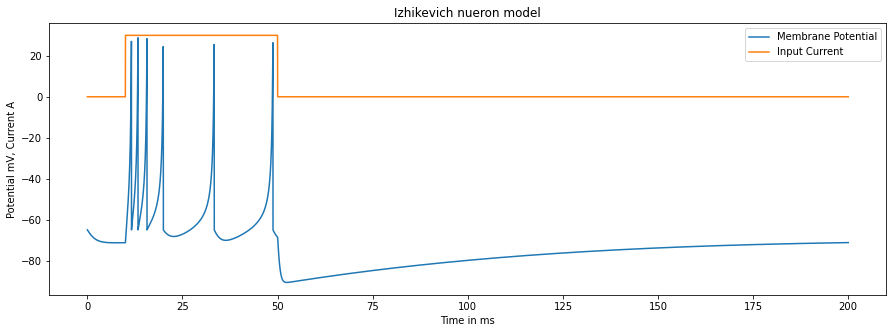

In [173]:
T = 200                     
dt  = 0.02                  
time = np.arange(0, T+dt, dt) 
I = np.zeros(len(time))
I[500:2500] = 30

V=Izhikevich(I=I,a=0.02,b=0.2,c=-65,d=8)

fig = plt.figure("Izh", figsize=(15, 5))
ax = fig.add_subplot(111)
plt.title("Izhikevich nueron model")


lineV = plt.plot(time, V, label="Membrane Potential")[0]
lineI = plt.plot(time, I, label="Input Current")[0]

plt.legend(loc="upper right")

# add axis labels
plt.ylabel("Potential mV, Current A")
plt.xlabel("Time in ms");